In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from scipy.optimize import curve_fit


In [4]:
df = pd.read_csv('C:/Users/Michael/University of Cambridge/PHY_US Group - Documents/MBQD-Shared/AION/Data/2023/08/22/Decay Rate Lifetime Experiments/Magnetic_off_decay_002/Magnetic_off_decay_002_3.csv',skiprows=[1])

In [5]:
df.iloc[:,1] = df.iloc[:,1]+30

In [6]:

df = df[df.iloc[:,0]  >= 720]

df = df[df.iloc[:,0]  <= 920]

In [7]:
window_size = 2
y_new = np.convolve(df.iloc[:,1], np.ones(window_size)/window_size, mode='valid')

In [8]:
x = df.iloc[:,0][(window_size-1)//2:-(window_size-1)//2]

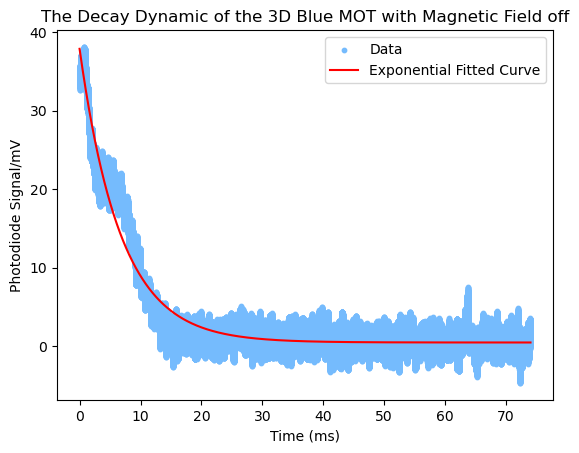

In [7]:
threshold = 846

# Use boolean indexing to filter values
filtered_indices = x >= threshold
filtered_x = x[filtered_indices]-846
filtered_y = y_new[filtered_indices]

def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

p0=[6.24245103*10**7, 1.08006444*10**(-1), 5.12469870*10**4]

params, covariance = curve_fit(exponential_decay,filtered_x , filtered_y,p0, maxfev=8000)

a_opt, b_opt, c_opt = params

y_fit = exponential_decay(filtered_x, a_opt, b_opt, c_opt)

plt.scatter(filtered_x, filtered_y,s=10,color = "xkcd:sky blue", label='Data')

plt.plot(filtered_x, y_fit, label='Exponential Fitted Curve', color='red')

plt.xlabel('Time (ms)')
plt.ylabel("Photodiode Signal/mV")
plt.title('The Decay Dynamic of the 3D Blue MOT with Magnetic Field off')
plt.legend()

# Show the plot
plt.show()

In [10]:
## On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:

import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style import set_plotting_style
set_plotting_style()

Initialising plotting style...
Success! Plotting style initialised.


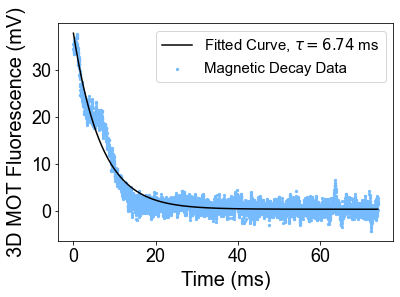

In [36]:
threshold = 846

# Use boolean indexing to filter values
filtered_indices = x >= threshold
filtered_x = x[filtered_indices]-846
filtered_y = y_new[filtered_indices]

def exponential_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

p0=[6.24245103*10**7, 1.08006444*10**(-1), 5.12469870*10**4]

params, covariance = curve_fit(exponential_decay,filtered_x , filtered_y,p0, maxfev=8000)

a_opt, b_opt, c_opt = params

tau = 1/b_opt

y_fit = exponential_decay(filtered_x, a_opt, b_opt, c_opt)

plt.scatter(filtered_x[::200], filtered_y[::200],s=5,alpha=1,color = "xkcd:sky blue", label='Magnetic Decay Data')

plt.plot(filtered_x, y_fit, label=r'Fitted Curve, $\tau = %.2f$ ms' %tau , color='black')

plt.xlabel('Time (ms)')
plt.ylabel("3D MOT Fluorescence (mV)")
# plt.title('The Decay Dynamic of the 3D Blue MOT with Magnetic Field off')
plt.legend()

# Show the plot
# plt.show()

plt.savefig('Magnetic_Decay_Signal.png', dpi=300, bbox_inches='tight')
plt.savefig('Magnetic_Decay_Signal.pdf', dpi=300, bbox_inches='tight')

In [18]:
print('The decay constant for magnetic decay is', b_opt, 'ms')
print('The lifetime is for magnetic decay', 1/b_opt, 'ms')

The decay constant for magnetic decay is 0.1483787913096012 ms
The lifetime is for magnetic decay 6.739507655871387 ms
